<a href="https://colab.research.google.com/github/Normal-case/MechineLearning/blob/master/randomForest_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 로드

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
import pandas as pd
import numpy as np
path = './drive/My Drive/인공지능 큐레이터/Machine Learning/data/'
dfRest = pd.read_csv(path + '201901-202003.csv')
df04 = pd.read_csv(path + '202004.csv')

In [3]:
df = pd.concat([dfRest, df04])

In [4]:
df

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1350317,202004,충북,충주시,휴양콘도 운영업,충북,충주시,20s,1,1,5,77000,5
1350318,202004,충북,충주시,휴양콘도 운영업,충북,충주시,30s,1,2,6,92000,6
1350319,202004,충북,충주시,휴양콘도 운영업,충북,충주시,40s,2,3,5,193000,5
1350320,202004,충북,충주시,휴양콘도 운영업,충북,충주시,50s,1,4,5,86000,7


In [5]:
del dfRest, df04

# 전처리

## 결측치 처리

In [6]:
df.loc[df['CARD_SIDO_NM'] == '세종', 'CARD_CCG_NM'] = '세종구'
df.loc[df['HOM_SIDO_NM'] == '세종', 'HOM_CCG_NM'] = '세종구'
df

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1350317,202004,충북,충주시,휴양콘도 운영업,충북,충주시,20s,1,1,5,77000,5
1350318,202004,충북,충주시,휴양콘도 운영업,충북,충주시,30s,1,2,6,92000,6
1350319,202004,충북,충주시,휴양콘도 운영업,충북,충주시,40s,2,3,5,193000,5
1350320,202004,충북,충주시,휴양콘도 운영업,충북,충주시,50s,1,4,5,86000,7


In [7]:
df.isna().sum()

REG_YYMM        0
CARD_SIDO_NM    0
CARD_CCG_NM     0
STD_CLSS_NM     0
HOM_SIDO_NM     0
HOM_CCG_NM      0
AGE             0
SEX_CTGO_CD     0
FLC             0
CSTMR_CNT       0
AMT             0
CNT             0
dtype: int64

In [8]:
df['REG_YYMM']

0          201901
1          201901
2          201901
3          201901
4          201901
            ...  
1350317    202004
1350318    202004
1350319    202004
1350320    202004
1350321    202004
Name: REG_YYMM, Length: 26048114, dtype: int64

## 이상치 처리

In [51]:
q1 = np.percentile(df['AMT'], 25); q1

90650.0

In [52]:
q3 = np.percentile(df['AMT'], 75); q3

847203.5

In [53]:
IQR = q3 - q1; IQR

756553.5

In [54]:
q1 - (1.5 * IQR)

-1044180.25

In [55]:
df[df['AMT'] < q1 - (1.5 * IQR)] # 낮은쪽의 이상치는 없음

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT


In [56]:
df[df['AMT'] > q3 + (1.5 * IQR)] # 높은쪽의 이상치 26048114

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
6,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,50s,1,4,21,3690830,21
7,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,50s,2,4,21,3573300,20
9,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,60s,2,5,33,7194600,40
13,201901,강원,강릉시,골프장 운영업,강원,강릉시,40s,1,3,23,3112350,28
16,201901,강원,강릉시,골프장 운영업,강원,강릉시,50s,1,4,50,7630550,68
...,...,...,...,...,...,...,...,...,...,...,...,...
1350311,202004,충북,충주시,화장품 및 방향제 소매업,충북,충주시,50s,1,4,55,4667900,59
1350312,202004,충북,충주시,화장품 및 방향제 소매업,충북,충주시,50s,2,4,178,11757000,203
1350313,202004,충북,충주시,화장품 및 방향제 소매업,충북,충주시,60s,1,5,46,3066220,47
1350314,202004,충북,충주시,화장품 및 방향제 소매업,충북,충주시,60s,2,5,123,11309840,134


In [57]:
df[df['AMT'] > q3 + (1.5 * IQR)]['AGE'].value_counts()

40s    910828
50s    787077
30s    761214
20s    501221
60s    477452
70s    156840
10s     19514
Name: AGE, dtype: int64

In [58]:
df[df['AMT'] > q3 + (1.5 * IQR)]['STD_CLSS_NM'].value_counts()

한식 음식점업                  687952
차량용 주유소 운영업              370321
기타 대형 종합 소매업             312562
체인화 편의점                  303646
슈퍼마켓                     218858
서양식 음식점업                 157491
스포츠 및 레크레이션 용품 임대업       119947
비알콜 음료점업                 111560
택시 운송업                    96726
피자 햄버거 샌드위치 및 유사 음식점업     89729
중식 음식점업                   89249
기타음식료품위주종합소매업             88144
그외 기타 종합 소매업              82397
육류 소매업                    80181
일식 음식점업                   79439
골프장 운영업                   74294
화장품 및 방향제 소매업             72114
빵 및 과자류 소매업               69760
과실 및 채소 소매업               59404
기타 외국식 음식점업               58432
정기 항공 운송업                 52393
일반유흥 주점업                  50783
면세점                       48020
버스 운송업                    34675
수산물 소매업                   33662
차량용 가스 충전업                27976
여관업                       26821
호텔업                       23803
욕탕업                       21787
기타 주점업                    17265
건강보조식품 소매업                15484
여행사업    

In [17]:
df[df['AMT'] > q3 + (1.5 * IQR)]['CARD_SIDO_NM'].value_counts()

서울    1048309
경기     784085
부산     309148
경남     184548
인천     181548
대구     148392
경북     148159
충남     119088
전남     107832
전북      96776
강원      95472
충북      94168
광주      86223
대전      68494
울산      67263
제주      64537
세종      10104
Name: CARD_SIDO_NM, dtype: int64

In [59]:
df_outlier = df[df['AMT'] > q3 + (1.5 * IQR)]

In [60]:
group = df_outlier.groupby(by = ['CARD_SIDO_NM', 'STD_CLSS_NM'])

In [61]:
group = group.count()['AMT']

In [21]:
group[group == 1] # 얘네는 확실히 이상치! 뭔가 이상함

CARD_SIDO_NM  STD_CLSS_NM    
강원            자동차 임대업            1
광주            그외 기타 스포츠시설 운영업    1
대전            여행사업               1
              자동차 임대업            1
세종            여관업                1
울산            면세점                1
              여행사업               1
인천            기타 수상오락 서비스업       1
              자동차 임대업            1
전북            내항 여객 운송업          1
              버스 운송업             1
충남            그외 기타 스포츠시설 운영업    1
Name: AMT, dtype: int64

In [22]:
df[(df['CARD_SIDO_NM'] == '강원') & (df['STD_CLSS_NM'] == '자동차 임대업')].sort_values(by = 'AMT', ascending =False)

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
15407881,201910,강원,춘천시,자동차 임대업,강원,춘천시,30s,1,2,3,3568000,3
10039474,201907,강원,속초시,자동차 임대업,강원,속초시,30s,1,2,3,1890567,4
23463568,202003,강원,원주시,자동차 임대업,강원,원주시,30s,1,2,3,1810000,4
11794118,201908,강원,원주시,자동차 임대업,강원,원주시,20s,1,1,6,1788000,13
20431626,202001,강원,강릉시,자동차 임대업,강원,강릉시,30s,1,2,4,1686000,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4874610,201904,강원,강릉시,자동차 임대업,강원,강릉시,60s,1,5,3,197400,3
6563343,201905,강원,원주시,자동차 임대업,강원,원주시,40s,1,3,3,178000,3
20431625,202001,강원,강릉시,자동차 임대업,강원,강릉시,20s,1,1,3,127500,4
11740868,201908,강원,강릉시,자동차 임대업,서울,중구,60s,1,5,3,123890,3


In [23]:
group[group == 1].index

MultiIndex([('강원',         '자동차 임대업'),
            ('광주', '그외 기타 스포츠시설 운영업'),
            ('대전',            '여행사업'),
            ('대전',         '자동차 임대업'),
            ('세종',             '여관업'),
            ('울산',             '면세점'),
            ('울산',            '여행사업'),
            ('인천',    '기타 수상오락 서비스업'),
            ('인천',         '자동차 임대업'),
            ('전북',       '내항 여객 운송업'),
            ('전북',          '버스 운송업'),
            ('충남', '그외 기타 스포츠시설 운영업')],
           names=['CARD_SIDO_NM', 'STD_CLSS_NM'])

In [24]:
df[(df['CARD_SIDO_NM'] == '충남') & (df['STD_CLSS_NM'] == '그외 기타 스포츠시설 운영업')].sort_values(by = 'AMT', ascending =False)

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
3131833,201902,충남,천안시 서북구,그외 기타 스포츠시설 운영업,충남,천안시 서북구,30s,1,2,50,2136500,56
17014624,201910,충남,천안시 서북구,그외 기타 스포츠시설 운영업,충남,천안시 서북구,40s,1,3,35,1974600,59
1541641,201901,충남,천안시 서북구,그외 기타 스포츠시설 운영업,충남,천안시 서북구,40s,1,3,52,1805200,67
13523892,201908,충남,천안시 서북구,그외 기타 스포츠시설 운영업,충남,천안시 서북구,40s,1,3,56,1735900,100
13523889,201908,충남,천안시 서북구,그외 기타 스포츠시설 운영업,충남,천안시 서북구,30s,1,2,45,1701000,78
...,...,...,...,...,...,...,...,...,...,...,...,...
8214674,201905,충남,천안시 서북구,그외 기타 스포츠시설 운영업,충남,천안시 서북구,20s,1,2,3,22800,4
9919592,201906,충남,천안시 동남구,그외 기타 스포츠시설 운영업,충남,천안시 서북구,40s,1,3,3,21200,3
22024221,202001,충남,천안시 서북구,그외 기타 스포츠시설 운영업,충남,천안시 동남구,20s,2,1,3,20500,4
18674827,201911,충남,천안시 서북구,그외 기타 스포츠시설 운영업,충남,아산시,40s,2,3,3,17000,3


In [25]:
len(group[group==1])

12

In [26]:
# 작업 중
outlier_lst = []
for i in range(len(group[group==1])):
  outlier_lst.append(df[(df['CARD_SIDO_NM'] == group[group==1].index[i][0]) & (df['STD_CLSS_NM'] == group[group==1].index[i][1])].sort_values(by = 'AMT', ascending =False))

In [27]:
outlier_lst # 0, 3, 5, 6, 9, 10
'''
삭제 할 칼럼
강원 - 자동차 임대업 - 30s - 15407881
대전 - 자동차 임대업 - 50s - 12551863
울산 - 면세점 - 40s - 7895761
울산 - 여행사업 - 50s - 4486264
전북 - 내항 여객 운송업 - 50s - 1405951
전북 - 버스 운송업 - 60s - 4681779
'''

'\n삭제 할 칼럼\n강원 - 자동차 임대업 - 30s - 15407881\n대전 - 자동차 임대업 - 50s - 12551863\n울산 - 면세점 - 40s - 7895761\n울산 - 여행사업 - 50s - 4486264\n전북 - 내항 여객 운송업 - 50s - 1405951\n전북 - 버스 운송업 - 60s - 4681779\n'

In [62]:
dummy = [15407881, 12551863, 7895761, 4486264, 1405951, 4681779]

In [63]:
df.loc[dummy]

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
15407881,201910,강원,춘천시,자동차 임대업,강원,춘천시,30s,1,2,3,3568000,3
12551863,201908,대전,중구,자동차 임대업,대전,동구,50s,1,4,3,3066500,3
7895761,201905,울산,중구,면세점,경남,양산시,40s,1,3,3,3415890,8
4486264,201903,울산,남구,여행사업,울산,북구,50s,2,4,4,3167000,4
1405951,201901,전북,군산시,내항 여객 운송업,전북,군산시,50s,1,4,3,2282000,18
4681779,201903,전북,전주시 덕진구,버스 운송업,전북,전주시 덕진구,60s,1,5,3,4502410,4


In [64]:
df = df.drop(dummy)

## 계절별, 업종별 사용량
-> 별로 쓸모가 없음

In [9]:
def season(series):
  spring = [3, 4, 5]
  summer = [6, 7, 8]
  autumn = [9, 10, 11]
  winter = [12, 1, 2]
  if series % 100 in winter:
    return 3
  elif series % 100 in spring:
    return 0
  elif series % 100 in summer:
    return 1
  elif series % 100 in autumn:
    return 2

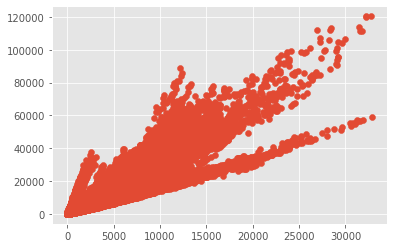

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.scatter(df['CSTMR_CNT'], df['CNT'])

In [10]:
group = df.groupby(by=['STD_CLSS_NM'])

In [11]:
group = group.sum()

In [ ]:
group.corr()['AMT']

REG_YYMM       0.860902
SEX_CTGO_CD    0.854680
FLC            0.898668
CSTMR_CNT      0.859603
AMT            1.000000
CNT            0.744625
Name: AMT, dtype: float64

In [ ]:
group.columns

Index(['REG_YYMM', 'SEX_CTGO_CD', 'FLC', 'CSTMR_CNT', 'AMT', 'CNT'], dtype='object')

In [ ]:
group.sort_values(by = 'CSTMR_CNT')

,REG_YYMM,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
STD_CLSS_NM,,,,,,
그외 기타 분류안된 오락관련 서비스업,59567285,403,682,1289,38055790,1444
기타 수상오락 서비스업,1347627413,7872,16570,34791,1775008221,53493
그외 기타 스포츠시설 운영업,2280907628,16147,28841,86106,2782149084,141638
마사지업,3784101186,22875,59497,151017,21100499633,199404
자동차 임대업,5550806338,36678,75001,165908,30429710791,187011
여행사업,9716760582,70175,155695,250255,109299664753,299908
관광 민예품 및 선물용품 소매업,16444920334,124244,219357,498274,15725175448,613680
내항 여객 운송업,15290940359,106566,231573,671937,43668247211,1133610
휴양콘도 운영업,23625701586,165762,348897,791400,80995116901,1395086


In [12]:
q1 = np.percentile(group['CSTMR_CNT'], 25)
q3 = np.percentile(group['CSTMR_CNT'], 75)

In [13]:
CNT0 = group[group['CSTMR_CNT'] < q1].index # CSTMR_CNT = 0

In [14]:
CNT1 = group[(group['CSTMR_CNT'] >= q1) & (group['CSTMR_CNT'] < q3)].index # CSTMR_CNT = 1

In [15]:
CNT2 = group[group['CSTMR_CNT'] >= q3].index; CNT2 # CSTMR_CNT = 2

Index(['기타 대형 종합 소매업', '비알콜 음료점업', '빵 및 과자류 소매업', '서양식 음식점업', '슈퍼마켓',
       '중식 음식점업', '차량용 주유소 운영업', '체인화 편의점', '택시 운송업', '피자 햄버거 샌드위치 및 유사 음식점업',
       '한식 음식점업'],
      dtype='object', name='STD_CLSS_NM')

In [ ]:
group.index

Index(['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업',
       '그외 기타 분류안된 오락관련 서비스업', '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업',
       '기타 대형 종합 소매업', '기타 수상오락 서비스업', '기타 외국식 음식점업', '기타 주점업',
       '기타음식료품위주종합소매업', '내항 여객 운송업', '마사지업', '면세점', '버스 운송업', '비알콜 음료점업',
       '빵 및 과자류 소매업', '서양식 음식점업', '수산물 소매업', '슈퍼마켓', '스포츠 및 레크레이션 용품 임대업',
       '여관업', '여행사업', '욕탕업', '육류 소매업', '일반유흥 주점업', '일식 음식점업', '자동차 임대업',
       '전시 및 행사 대행업', '정기 항공 운송업', '중식 음식점업', '차량용 가스 충전업', '차량용 주유소 운영업',
       '체인화 편의점', '택시 운송업', '피자 햄버거 샌드위치 및 유사 음식점업', '한식 음식점업', '호텔업',
       '화장품 및 방향제 소매업', '휴양콘도 운영업'],
      dtype='object', name='STD_CLSS_NM')

In [16]:
def CNT(series):
  if series in CNT0:
    return 0
  elif series in CNT1:
    return 1
  elif series in CNT2:
    return 2

In [65]:
group = df.groupby(by = ['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'])

In [66]:
group = group.sum()['AMT']

In [67]:
group = group.reset_index()

In [68]:
group

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,201901,강원,건강보조식품 소매업,148354746
1,201901,강원,골프장 운영업,1229200312
2,201901,강원,과실 및 채소 소매업,1286979106
3,201901,강원,관광 민예품 및 선물용품 소매업,30656770
4,201901,강원,그외 기타 스포츠시설 운영업,13101500
...,...,...,...,...
10040,202004,충북,피자 햄버거 샌드위치 및 유사 음식점업,1373635928
10041,202004,충북,한식 음식점업,18911036160
10042,202004,충북,호텔업,14121500
10043,202004,충북,화장품 및 방향제 소매업,450507431


In [69]:
group['Season'] = group['REG_YYMM'].map(season)
group['CSTMR_CLSS'] = group['STD_CLSS_NM'].map(CNT)

In [70]:
group

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT,Season,CSTMR_CLSS
0,201901,강원,건강보조식품 소매업,148354746,3,0
1,201901,강원,골프장 운영업,1229200312,3,1
2,201901,강원,과실 및 채소 소매업,1286979106,3,1
3,201901,강원,관광 민예품 및 선물용품 소매업,30656770,3,0
4,201901,강원,그외 기타 스포츠시설 운영업,13101500,3,0
...,...,...,...,...,...,...
10040,202004,충북,피자 햄버거 샌드위치 및 유사 음식점업,1373635928,0,2
10041,202004,충북,한식 음식점업,18911036160,0,2
10042,202004,충북,호텔업,14121500,0,1
10043,202004,충북,화장품 및 방향제 소매업,450507431,0,1


In [71]:
def drop_year(series):
  return series // 100

In [72]:
group['REG_YYMM'] = group['REG_YYMM'].map(drop_year)

In [73]:
group

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT,Season,CSTMR_CLSS
0,2019,강원,건강보조식품 소매업,148354746,3,0
1,2019,강원,골프장 운영업,1229200312,3,1
2,2019,강원,과실 및 채소 소매업,1286979106,3,1
3,2019,강원,관광 민예품 및 선물용품 소매업,30656770,3,0
4,2019,강원,그외 기타 스포츠시설 운영업,13101500,3,0
...,...,...,...,...,...,...
10040,2020,충북,피자 햄버거 샌드위치 및 유사 음식점업,1373635928,0,2
10041,2020,충북,한식 음식점업,18911036160,0,2
10042,2020,충북,호텔업,14121500,0,1
10043,2020,충북,화장품 및 방향제 소매업,450507431,0,1


# 인코딩

## 레이블 인코딩

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [27]:
group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10048 entries, 0 to 10047
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   REG_YYMM      10048 non-null  int64 
 1   CARD_SIDO_NM  10048 non-null  object
 2   STD_CLSS_NM   10048 non-null  object
 3   AMT           10048 non-null  int64 
 4   Season        10048 non-null  int64 
 5   CSTMR_CLSS    10048 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 471.1+ KB


In [28]:
encoder.fit(group['CARD_SIDO_NM'])
group['CARD_SIDO_NM'] = encoder.transform(group['CARD_SIDO_NM'])
# encoder.fit(df['CARD_CCG_NM'])
# df['CARD_CCG_NM'] = encoder.transform(df['CARD_CCG_NM'])
encoder.fit(group['STD_CLSS_NM'])
group['STD_CLSS_NM'] = encoder.transform(group['STD_CLSS_NM'])
# encoder.fit(df['HOM_SIDO_NM'])
# df['HOM_SIDO_NM'] = encoder.transform(df['HOM_SIDO_NM'])
# encoder.fit(df['HOM_CCG_NM'])
# df['HOM_CCG_NM'] = encoder.transform(df['HOM_CCG_NM'])
# encoder.fit(df['AGE'])
# df['AGE'] = encoder.transform(df['AGE'])

In [29]:
group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10048 entries, 0 to 10047
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   REG_YYMM      10048 non-null  int64
 1   CARD_SIDO_NM  10048 non-null  int64
 2   STD_CLSS_NM   10048 non-null  int64
 3   AMT           10048 non-null  int64
 4   Season        10048 non-null  int64
 5   CSTMR_CLSS    10048 non-null  int64
dtypes: int64(6)
memory usage: 471.1 KB


In [30]:
group

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT,Season,CSTMR_CLSS
0,2019,0,0,148354746,3,0
1,2019,0,1,1229200312,3,1
2,2019,0,2,1286979106,3,1
3,2019,0,3,30656770,3,0
4,2019,0,5,13101500,3,0
...,...,...,...,...,...,...
10043,2020,16,36,1373635928,0,2
10044,2020,16,37,18911036160,0,2
10045,2020,16,38,14121500,0,1
10046,2020,16,39,450507431,0,1


## 원핫 인코딩

In [74]:
group = pd.get_dummies(group)

# 예측 모델

## 랜덤 포레스트 예측

In [31]:
y_target = group['AMT']
X_data = group.drop(['AMT'], axis = 1)

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.2, random_state = 0)

rf = RandomForestRegressor(random_state = 0, n_estimators = 10)

In [33]:
import time
import numpy as np
start = time.time()
rf.fit(X_train, y_train)
print(np.round(time.time() - start, 2))

0.12


In [34]:
pred = rf.predict(X_test)

In [35]:
from sklearn.metrics import r2_score

print('Avg :', y_test.mean())
print('MSE :', mean_squared_error(y_test, pred))
print('RMSE :', mean_squared_error(y_test, pred)**0.5)
print('r2_score :', r2_score(y_test, pred))

Avg : 6056003328.756219
MSE : 4.491197698319529e+18
RMSE : 2119244605.5893428
r2_score : 0.9866375204491218


## XGBoost 예측

In [79]:
y_target = group['AMT']
X_data = group.drop(['AMT'], axis = 1)

In [80]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.2, random_state = 0)

xgb_wrapper = XGBRegressor(n_estimators = 50, learning_rate = 0.3, max_depth = 6, random_state = 0)

In [81]:
import time
start = time.time()
xgb_wrapper.fit(X_train, y_train)
print('걸린 시간 :', time.time() - start)

[08:15:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
걸린 시간 : 1.0397355556488037


In [82]:
pred = xgb_wrapper.predict(X_test)

In [83]:
from sklearn.metrics import r2_score

print('Avg :', y_test.mean())
print('MSE :', mean_squared_error(y_test, pred))
print('RMSE :', mean_squared_error(y_test, pred)**0.5)
print('r2_score :', r2_score(y_test, pred))

Avg : 7268602368.827277
MSE : 5.490809503848628e+18
RMSE : 2343247640.3164535
r2_score : 0.986083593840832


### GridSearchCV 최적 파라미터 도출

In [ ]:
# pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp36-none-any.whl size=11685 sha256=b2190c6a598f6cb9839594d7af60449e8be62aaf0f5a86133712398545378139
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [ ]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'n_estimator':[50,100,500,1000, 5000, 10000],
    'learning_rate':[0.1, 0.15, 0.2, 0.25, 0.3],
    'max_depth':[3, 6, 9, 12]
}

In [ ]:
xgb = XGBRegressor(random_state=0)

In [ ]:
grid_cv = GridSearchCV(xgb, param_grid = params, cv = 5)

In [ ]:
import time
start = time.time()
grid_cv.fit(X_train, y_train)
print('걸린 시간 :', time.time() - start)

[05:31:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:31:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:31:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:31:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:31:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:31:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:31:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:31:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
print('최적 하이퍼 파라미터 :\n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터 :
 {'learning_rate': 0.3, 'max_depth': 6, 'n_estimator': 50}
최고 예측 정확도 : 0.9920


In [ ]:
pred = grid_cv.best_estimator_.predict(X_test)

In [ ]:
print('Avg :', y_test.mean())
print('MSE :', mean_squared_error(y_test, pred))
print('RMSE :', mean_squared_error(y_test, pred)**0.5)
print('r2_score :', r2_score(y_test, pred))

Avg : 6056003328.756219
MSE : 2.2539174671092982e+18
RMSE : 1501305254.4733527
r2_score : 0.9932940101757524
